In [50]:
import pandas as pd
import numpy as np
from torch.utils.data.dataset import Dataset

class Gamestop(Dataset):
    def __init__(self):

        self.url = 'C:\School\csci 4353\csci-4353-JorgeCaPe\labs\hw2_data\gmeStock.csv'
        self.csv = pd.read_csv(self.url)
        self.csv['Close/Last'] = self.csv['Close/Last'].str.replace('$', '').astype(float)
        self.csv['Open'] = self.csv['Open'].str.replace('$', '').astype(float)
        self.csv['High'] = self.csv['High'].str.replace('$', '').astype(float)
        self.csv['Low'] = self.csv['Low'].str.replace('$', '').astype(float)
        self.csv = self.csv[['Date', 'Open', 'High', 'Low', 'Volume', 'Close/Last']]

        self.data = self.csv.iloc[:, 1:4].values
        self.data = self.data / np.max(self.data)

        self.label = self.csv["Close/Last"].values
        self.label = self.label / np.max(self.label)

    def __len__(self):
        return len(self.data) - 30

    def __getitem__(self, i):
        data = self.data[i:i+30]
        label = self.label[i:i+30]
        return data, label

In [51]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=3, hidden_size=8, num_layers=5, batch_first=True)
        self.fc1 = nn.Linear(in_features=240, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0)

        x = torch.reshape(x, (x.shape[0], -1))

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        x = torch.flatten(x)

        return x


In [52]:
from tqdm import tqdm
from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader
device = "cuda" if torch.cuda.is_available() else "cpu"
model = RNN().to(device)
dataset = Gamestop()

loader = DataLoader(dataset, batch_size=8)

optim = Adam(params=model.parameters(), lr=0.0001)
#criterion = nn.MSELoss()

for epoch in range(200):
    iterator = tqdm(loader)
    for data, label in iterator:
        optim.zero_grad()
        h0 = torch.zeros(5, data.shape[0], 8).to(device)
        data = data.type(torch.FloatTensor).to(device)
        pred = model(data, h0)
        #print(pred)
        #print(label[:, -1])
        #print(label.type(torch.FloatTensor).to(device))
        loss = nn.MSELoss()(pred, label[:,-1].type(torch.FloatTensor).to(device))
        loss.backward()
        optim.step()
        # iterator.set_description(f"epoch {epoch} loss: {loss.item()}")
    print(f"epoch{epoch+1} loss:{loss.item()}")
torch.save(model.state_dict(), "Gamestop.pth")

100%|██████████| 28/28 [00:00<00:00, 458.57it/s]


epoch1 loss:0.3652717173099518


100%|██████████| 28/28 [00:00<00:00, 458.59it/s]


epoch2 loss:0.0917169377207756


100%|██████████| 28/28 [00:00<00:00, 458.61it/s]


epoch3 loss:0.025384658947587013


100%|██████████| 28/28 [00:00<00:00, 423.85it/s]


epoch4 loss:0.0242660790681839


100%|██████████| 28/28 [00:00<00:00, 451.21it/s]


epoch5 loss:0.026843516156077385


100%|██████████| 28/28 [00:00<00:00, 451.21it/s]


epoch6 loss:0.026576457545161247


100%|██████████| 28/28 [00:00<00:00, 466.25it/s]


epoch7 loss:0.026548683643341064


100%|██████████| 28/28 [00:00<00:00, 458.60it/s]


epoch8 loss:0.026622334495186806


100%|██████████| 28/28 [00:00<00:00, 465.96it/s]


epoch9 loss:0.026652304455637932


100%|██████████| 28/28 [00:00<00:00, 451.20it/s]


epoch10 loss:0.026682186871767044


100%|██████████| 28/28 [00:00<00:00, 482.32it/s]


epoch11 loss:0.026708653196692467


100%|██████████| 28/28 [00:00<00:00, 474.14it/s]


epoch12 loss:0.026730963960289955


100%|██████████| 28/28 [00:00<00:00, 474.15it/s]


epoch13 loss:0.02675006166100502


100%|██████████| 28/28 [00:00<00:00, 443.52it/s]


epoch14 loss:0.026766015216708183


100%|██████████| 28/28 [00:00<00:00, 466.24it/s]


epoch15 loss:0.026779068633913994


100%|██████████| 28/28 [00:00<00:00, 458.60it/s]


epoch16 loss:0.026789454743266106


100%|██████████| 28/28 [00:00<00:00, 458.60it/s]


epoch17 loss:0.026797225698828697


100%|██████████| 28/28 [00:00<00:00, 458.60it/s]


epoch18 loss:0.026802560314536095


100%|██████████| 28/28 [00:00<00:00, 451.20it/s]


epoch19 loss:0.026805564761161804


100%|██████████| 28/28 [00:00<00:00, 458.68it/s]


epoch20 loss:0.026806289330124855


100%|██████████| 28/28 [00:00<00:00, 474.14it/s]


epoch21 loss:0.02680474892258644


100%|██████████| 28/28 [00:00<00:00, 454.73it/s]


epoch22 loss:0.02680102549493313


100%|██████████| 28/28 [00:00<00:00, 452.94it/s]


epoch23 loss:0.026795176789164543


100%|██████████| 28/28 [00:00<00:00, 444.03it/s]


epoch24 loss:0.02678716741502285


100%|██████████| 28/28 [00:00<00:00, 431.43it/s]


epoch25 loss:0.026777073740959167


100%|██████████| 28/28 [00:00<00:00, 474.84it/s]


epoch26 loss:0.026764798909425735


100%|██████████| 28/28 [00:00<00:00, 466.24it/s]


epoch27 loss:0.026750409975647926


100%|██████████| 28/28 [00:00<00:00, 477.82it/s]


epoch28 loss:0.026733845472335815


100%|██████████| 28/28 [00:00<00:00, 474.14it/s]


epoch29 loss:0.02671508863568306


100%|██████████| 28/28 [00:00<00:00, 466.04it/s]


epoch30 loss:0.026694107800722122


100%|██████████| 28/28 [00:00<00:00, 467.61it/s]


epoch31 loss:0.026670843362808228


100%|██████████| 28/28 [00:00<00:00, 466.24it/s]


epoch32 loss:0.02664526365697384


100%|██████████| 28/28 [00:00<00:00, 466.24it/s]


epoch33 loss:0.02661730721592903


100%|██████████| 28/28 [00:00<00:00, 451.20it/s]


epoch34 loss:0.026586879044771194


100%|██████████| 28/28 [00:00<00:00, 405.42it/s]


epoch35 loss:0.026553934440016747


100%|██████████| 28/28 [00:00<00:00, 444.04it/s]


epoch36 loss:0.026519710198044777


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch37 loss:0.02647976577281952


100%|██████████| 28/28 [00:00<00:00, 444.04it/s]


epoch38 loss:0.02643890678882599


100%|██████████| 28/28 [00:00<00:00, 451.20it/s]


epoch39 loss:0.02639468014240265


100%|██████████| 28/28 [00:00<00:00, 451.20it/s]


epoch40 loss:0.026347393169999123


100%|██████████| 28/28 [00:00<00:00, 466.23it/s]


epoch41 loss:0.026296818628907204


100%|██████████| 28/28 [00:00<00:00, 466.13it/s]


epoch42 loss:0.026242787018418312


100%|██████████| 28/28 [00:00<00:00, 440.49it/s]


epoch43 loss:0.026185182854533195


100%|██████████| 28/28 [00:00<00:00, 425.70it/s]


epoch44 loss:0.026123732328414917


100%|██████████| 28/28 [00:00<00:00, 405.43it/s]


epoch45 loss:0.02605826035141945


100%|██████████| 28/28 [00:00<00:00, 444.04it/s]


epoch46 loss:0.02598852477967739


100%|██████████| 28/28 [00:00<00:00, 442.57it/s]


epoch47 loss:0.025914305821061134


100%|██████████| 28/28 [00:00<00:00, 428.53it/s]


epoch48 loss:0.02583528868854046


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch49 loss:0.025751305744051933


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch50 loss:0.025661960244178772


100%|██████████| 28/28 [00:00<00:00, 412.11it/s]


epoch51 loss:0.025566954165697098


100%|██████████| 28/28 [00:00<00:00, 399.64it/s]


epoch52 loss:0.025465989485383034


100%|██████████| 28/28 [00:00<00:00, 411.38it/s]


epoch53 loss:0.025358647108078003


100%|██████████| 28/28 [00:00<00:00, 430.37it/s]


epoch54 loss:0.025244668126106262


100%|██████████| 28/28 [00:00<00:00, 423.85it/s]


epoch55 loss:0.025123536586761475


100%|██████████| 28/28 [00:00<00:00, 398.69it/s]


epoch56 loss:0.024994947016239166


100%|██████████| 28/28 [00:00<00:00, 437.10it/s]


epoch57 loss:0.024858510121703148


100%|██████████| 28/28 [00:00<00:00, 423.24it/s]


epoch58 loss:0.02471371367573738


100%|██████████| 28/28 [00:00<00:00, 430.39it/s]


epoch59 loss:0.024559972807765007


100%|██████████| 28/28 [00:00<00:00, 437.10it/s]


epoch60 loss:0.024398529902100563


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch61 loss:0.02422615885734558


100%|██████████| 28/28 [00:00<00:00, 430.37it/s]


epoch62 loss:0.024044593796133995


100%|██████████| 28/28 [00:00<00:00, 451.20it/s]


epoch63 loss:0.023852750658988953


100%|██████████| 28/28 [00:00<00:00, 423.47it/s]


epoch64 loss:0.023650575429201126


100%|██████████| 28/28 [00:00<00:00, 423.57it/s]


epoch65 loss:0.023437801748514175


100%|██████████| 28/28 [00:00<00:00, 360.14it/s]


epoch66 loss:0.023214254528284073


100%|██████████| 28/28 [00:00<00:00, 400.29it/s]


epoch67 loss:0.022979872301220894


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch68 loss:0.022734560072422028


100%|██████████| 28/28 [00:00<00:00, 416.74it/s]


epoch69 loss:0.022468749433755875


100%|██████████| 28/28 [00:00<00:00, 431.49it/s]


epoch70 loss:0.02218918316066265


100%|██████████| 28/28 [00:00<00:00, 425.99it/s]


epoch71 loss:0.021733358502388


100%|██████████| 28/28 [00:00<00:00, 426.61it/s]


epoch72 loss:0.021660802885890007


100%|██████████| 28/28 [00:00<00:00, 423.84it/s]


epoch73 loss:0.021207846701145172


100%|██████████| 28/28 [00:00<00:00, 412.22it/s]


epoch74 loss:0.02095908299088478


100%|██████████| 28/28 [00:00<00:00, 424.15it/s]


epoch75 loss:0.02062680386006832


100%|██████████| 28/28 [00:00<00:00, 406.94it/s]


epoch76 loss:0.02030388079583645


100%|██████████| 28/28 [00:00<00:00, 410.11it/s]


epoch77 loss:0.019967833533883095


100%|██████████| 28/28 [00:00<00:00, 420.44it/s]


epoch78 loss:0.019608207046985626


100%|██████████| 28/28 [00:00<00:00, 416.08it/s]


epoch79 loss:0.019288526847958565


100%|██████████| 28/28 [00:00<00:00, 424.56it/s]


epoch80 loss:0.018912820145487785


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch81 loss:0.018554193899035454


100%|██████████| 28/28 [00:00<00:00, 417.53it/s]


epoch82 loss:0.018188176676630974


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch83 loss:0.01780320331454277


100%|██████████| 28/28 [00:00<00:00, 417.53it/s]


epoch84 loss:0.017428839579224586


100%|██████████| 28/28 [00:00<00:00, 422.48it/s]


epoch85 loss:0.01704714633524418


100%|██████████| 28/28 [00:00<00:00, 437.10it/s]


epoch86 loss:0.016639357432723045


100%|██████████| 28/28 [00:00<00:00, 388.53it/s]


epoch87 loss:0.01630723848938942


100%|██████████| 28/28 [00:00<00:00, 423.87it/s]


epoch88 loss:0.015804985538125038


100%|██████████| 28/28 [00:00<00:00, 423.78it/s]


epoch89 loss:0.015550630167126656


100%|██████████| 28/28 [00:00<00:00, 411.38it/s]


epoch90 loss:0.014989939518272877


100%|██████████| 28/28 [00:00<00:00, 430.36it/s]


epoch91 loss:0.01474831998348236


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch92 loss:0.014181174337863922


100%|██████████| 28/28 [00:00<00:00, 433.03it/s]


epoch93 loss:0.013947076164186


100%|██████████| 28/28 [00:00<00:00, 397.50it/s]


epoch94 loss:0.013384783640503883


100%|██████████| 28/28 [00:00<00:00, 429.89it/s]


epoch95 loss:0.013138474896550179


100%|██████████| 28/28 [00:00<00:00, 412.76it/s]


epoch96 loss:0.012581348419189453


100%|██████████| 28/28 [00:00<00:00, 420.62it/s]


epoch97 loss:0.012330851517617702


100%|██████████| 28/28 [00:00<00:00, 418.11it/s]


epoch98 loss:0.01182002853602171


100%|██████████| 28/28 [00:00<00:00, 398.50it/s]


epoch99 loss:0.011537479236721992


100%|██████████| 28/28 [00:00<00:00, 423.85it/s]


epoch100 loss:0.011072160676121712


100%|██████████| 28/28 [00:00<00:00, 429.26it/s]


epoch101 loss:0.010716513730585575


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch102 loss:0.010326343588531017


100%|██████████| 28/28 [00:00<00:00, 405.42it/s]


epoch103 loss:0.009943143464624882


100%|██████████| 28/28 [00:00<00:00, 407.91it/s]


epoch104 loss:0.00950190331786871


100%|██████████| 28/28 [00:00<00:00, 430.36it/s]


epoch105 loss:0.009115844964981079


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch106 loss:0.00879963394254446


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch107 loss:0.008355189114809036


100%|██████████| 28/28 [00:00<00:00, 408.45it/s]


epoch108 loss:0.008048739284276962


100%|██████████| 28/28 [00:00<00:00, 408.31it/s]


epoch109 loss:0.007651188410818577


100%|██████████| 28/28 [00:00<00:00, 415.66it/s]


epoch110 loss:0.007333302404731512


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch111 loss:0.006944338325411081


100%|██████████| 28/28 [00:00<00:00, 416.85it/s]


epoch112 loss:0.006649123039096594


100%|██████████| 28/28 [00:00<00:00, 420.64it/s]


epoch113 loss:0.006302169058471918


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch114 loss:0.005988267716020346


100%|██████████| 28/28 [00:00<00:00, 424.97it/s]


epoch115 loss:0.005704286973923445


100%|██████████| 28/28 [00:00<00:00, 422.62it/s]


epoch116 loss:0.005407547578215599


100%|██████████| 28/28 [00:00<00:00, 411.37it/s]


epoch117 loss:0.0051165553741157055


100%|██████████| 28/28 [00:00<00:00, 433.83it/s]


epoch118 loss:0.004841438494622707


100%|██████████| 28/28 [00:00<00:00, 434.69it/s]


epoch119 loss:0.004633288364857435


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch120 loss:0.006027375813573599


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch121 loss:0.005030978471040726


100%|██████████| 28/28 [00:00<00:00, 416.89it/s]


epoch122 loss:0.004341031424701214


100%|██████████| 28/28 [00:00<00:00, 393.41it/s]


epoch123 loss:0.0038656059186905622


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch124 loss:0.003598525421693921


100%|██████████| 28/28 [00:00<00:00, 401.68it/s]


epoch125 loss:0.0034107284154742956


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch126 loss:0.0032440300565212965


100%|██████████| 28/28 [00:00<00:00, 423.85it/s]


epoch127 loss:0.0031066087540239096


100%|██████████| 28/28 [00:00<00:00, 458.60it/s]


epoch128 loss:0.0029932286124676466


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch129 loss:0.0029290260281413794


100%|██████████| 28/28 [00:00<00:00, 429.08it/s]


epoch130 loss:0.0028382998425513506


100%|██████████| 28/28 [00:00<00:00, 388.54it/s]


epoch131 loss:0.002740660449489951


100%|██████████| 28/28 [00:00<00:00, 410.59it/s]


epoch132 loss:0.002682731719687581


100%|██████████| 28/28 [00:00<00:00, 403.98it/s]


epoch133 loss:0.0026383833028376102


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch134 loss:0.0025757874827831984


100%|██████████| 28/28 [00:00<00:00, 420.65it/s]


epoch135 loss:0.002537426771596074


100%|██████████| 28/28 [00:00<00:00, 404.32it/s]


epoch136 loss:0.002484680851921439


100%|██████████| 28/28 [00:00<00:00, 407.26it/s]


epoch137 loss:0.0024498554412275553


100%|██████████| 28/28 [00:00<00:00, 431.05it/s]


epoch138 loss:0.0024132337421178818


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch139 loss:0.002394161419942975


100%|██████████| 28/28 [00:00<00:00, 388.53it/s]


epoch140 loss:0.002363490406423807


100%|██████████| 28/28 [00:00<00:00, 383.21it/s]


epoch141 loss:0.002343864645808935


100%|██████████| 28/28 [00:00<00:00, 370.43it/s]


epoch142 loss:0.0023231736849993467


100%|██████████| 28/28 [00:00<00:00, 392.55it/s]


epoch143 loss:0.002302988199517131


100%|██████████| 28/28 [00:00<00:00, 413.04it/s]


epoch144 loss:0.0022845137864351273


100%|██████████| 28/28 [00:00<00:00, 397.91it/s]


epoch145 loss:0.0022651252802461386


100%|██████████| 28/28 [00:00<00:00, 420.64it/s]


epoch146 loss:0.0022542758379131556


100%|██████████| 28/28 [00:00<00:00, 417.53it/s]


epoch147 loss:0.0022309725172817707


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch148 loss:0.002222837647423148


100%|██████████| 28/28 [00:00<00:00, 411.02it/s]


epoch149 loss:0.0022105961106717587


100%|██████████| 28/28 [00:00<00:00, 410.68it/s]


epoch150 loss:0.0021967662032693624


100%|██████████| 28/28 [00:00<00:00, 411.39it/s]


epoch151 loss:0.002184756798669696


100%|██████████| 28/28 [00:00<00:00, 399.92it/s]


epoch152 loss:0.002171636326238513


100%|██████████| 28/28 [00:00<00:00, 400.36it/s]


epoch153 loss:0.002157019218429923


100%|██████████| 28/28 [00:00<00:00, 399.64it/s]


epoch154 loss:0.0021403308492153883


100%|██████████| 28/28 [00:00<00:00, 405.42it/s]


epoch155 loss:0.0021284446120262146


100%|██████████| 28/28 [00:00<00:00, 430.37it/s]


epoch156 loss:0.002107824431732297


100%|██████████| 28/28 [00:00<00:00, 433.86it/s]


epoch157 loss:0.0021009903866797686


100%|██████████| 28/28 [00:00<00:00, 415.78it/s]


epoch158 loss:0.002082452178001404


100%|██████████| 28/28 [00:00<00:00, 395.65it/s]


epoch159 loss:0.002070071641355753


100%|██████████| 28/28 [00:00<00:00, 424.95it/s]


epoch160 loss:0.0020454581826925278


100%|██████████| 28/28 [00:00<00:00, 416.77it/s]


epoch161 loss:0.002033027820289135


100%|██████████| 28/28 [00:00<00:00, 427.07it/s]


epoch162 loss:0.0020198978018015623


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch163 loss:0.002005100715905428


100%|██████████| 28/28 [00:00<00:00, 396.70it/s]


epoch164 loss:0.001989547861739993


100%|██████████| 28/28 [00:00<00:00, 407.11it/s]


epoch165 loss:0.0019748439081013203


100%|██████████| 28/28 [00:00<00:00, 404.31it/s]


epoch166 loss:0.0019641919061541557


100%|██████████| 28/28 [00:00<00:00, 399.43it/s]


epoch167 loss:0.0019536572508513927


100%|██████████| 28/28 [00:00<00:00, 405.41it/s]


epoch168 loss:0.001939248526468873


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch169 loss:0.001925140037201345


100%|██████████| 28/28 [00:00<00:00, 420.36it/s]


epoch170 loss:0.0019169122679159045


100%|██████████| 28/28 [00:00<00:00, 425.88it/s]


epoch171 loss:0.001909315469674766


100%|██████████| 28/28 [00:00<00:00, 419.45it/s]


epoch172 loss:0.0018998150480911136


100%|██████████| 28/28 [00:00<00:00, 415.86it/s]


epoch173 loss:0.0018916629487648606


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch174 loss:0.0018828775500878692


100%|██████████| 28/28 [00:00<00:00, 429.07it/s]


epoch175 loss:0.0018752902979031205


100%|██████████| 28/28 [00:00<00:00, 411.38it/s]


epoch176 loss:0.0018680546199902892


100%|██████████| 28/28 [00:00<00:00, 399.72it/s]


epoch177 loss:0.0018558151787146926


100%|██████████| 28/28 [00:00<00:00, 399.64it/s]


epoch178 loss:0.001848723040893674


100%|██████████| 28/28 [00:00<00:00, 402.05it/s]


epoch179 loss:0.0018371393671259284


100%|██████████| 28/28 [00:00<00:00, 417.53it/s]


epoch180 loss:0.0018284720135852695


100%|██████████| 28/28 [00:00<00:00, 394.00it/s]


epoch181 loss:0.0018224746454507113


100%|██████████| 28/28 [00:00<00:00, 391.23it/s]


epoch182 loss:0.0018115835264325142


100%|██████████| 28/28 [00:00<00:00, 399.64it/s]


epoch183 loss:0.0018086455529555678


100%|██████████| 28/28 [00:00<00:00, 416.46it/s]


epoch184 loss:0.0018004464218392968


100%|██████████| 28/28 [00:00<00:00, 430.38it/s]


epoch185 loss:0.001791551010683179


100%|██████████| 28/28 [00:00<00:00, 410.78it/s]


epoch186 loss:0.001781375496648252


100%|██████████| 28/28 [00:00<00:00, 386.06it/s]


epoch187 loss:0.0017725782236084342


100%|██████████| 28/28 [00:00<00:00, 423.94it/s]


epoch188 loss:0.0017661650199443102


100%|██████████| 28/28 [00:00<00:00, 423.86it/s]


epoch189 loss:0.0017553346697241068


100%|██████████| 28/28 [00:00<00:00, 417.29it/s]


epoch190 loss:0.0017458511283621192


100%|██████████| 28/28 [00:00<00:00, 417.48it/s]


epoch191 loss:0.0017369225388392806


100%|██████████| 28/28 [00:00<00:00, 428.04it/s]


epoch192 loss:0.0017313351854681969


100%|██████████| 28/28 [00:00<00:00, 407.31it/s]


epoch193 loss:0.0017208316130563617


100%|██████████| 28/28 [00:00<00:00, 430.37it/s]


epoch194 loss:0.0017139072297140956


100%|██████████| 28/28 [00:00<00:00, 394.00it/s]


epoch195 loss:0.0017037298530340195


100%|██████████| 28/28 [00:00<00:00, 411.37it/s]


epoch196 loss:0.0016948331613093615


100%|██████████| 28/28 [00:00<00:00, 417.53it/s]


epoch197 loss:0.001685885014012456


100%|██████████| 28/28 [00:00<00:00, 417.52it/s]


epoch198 loss:0.0016785322222858667


100%|██████████| 28/28 [00:00<00:00, 417.47it/s]


epoch199 loss:0.0016671769553795457


100%|██████████| 28/28 [00:00<00:00, 414.37it/s]

epoch200 loss:0.0016583268297836185


In [53]:
import matplotlib.pyplot as plt

loader = DataLoader(dataset, batch_size=1)

preds = []
total_loss = 0

with torch.no_grad():
    model.load_state_dict(torch.load("Gamestop.pth", map_location=device))
    for data, label in loader:
        h0 = torch.zeros(5, data.shape[0], 8).to(device)

        pred = model(data.type(torch.FloatTensor).to(device), h0)
        preds.append(pred.item())

        loss = nn.MSELoss()(pred, label[:,-1].type(torch.FloatTensor).to(device))

        total_loss += loss/len(loader)
print(total_loss)

tensor(0.0021, device='cuda:0')


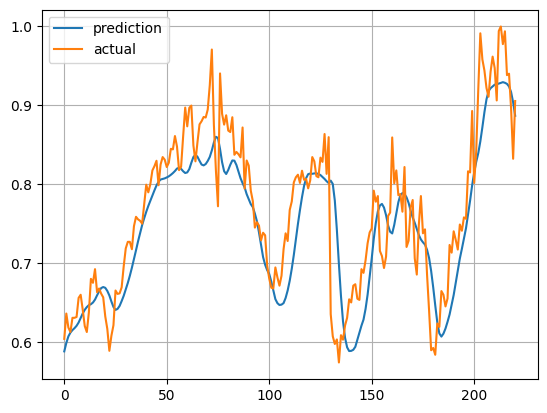

In [54]:
plt.plot(preds, label="prediction")
plt.plot(dataset.label[30:], label="actual")
plt.legend()
plt.grid()
plt.show()